In [10]:
%matplotlib inline
from setup import *

<h1>Generate feature matrix csv </h1>

In [11]:
for fconn in ['broadband_CC','alphatheta','beta','lowgamma','highgamma','veryhigh']:
        skip_chop = True
        skip_mayo = True
        skip_hup = False
        dilate_radius = 0
        all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)        
        all_base_sync = get_norm(all_base_sync)
        num_fts = all_base_sync.values()[0].values()[0].shape[0]
        
        pt_iter = 0
        patient_idx = all_base_sync.keys()
        ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_base_sync.values())),num_fts+2))
        
        out_txt = 'pt_id,' #First column
        index_col = []    

        for patient_id in sorted(patient_idx):
                if(skip_chop and 'CHOP' in patient_id):
                    continue
                if(skip_mayo and 'Study' in patient_id):
                    continue
                if(skip_hup and 'HUP' in patient_id):
                    continue
                if not all_base_sync[patient_id]:
                    continue
#                 print patient_id
                index_col.append(patient_id)
                row_data = np.array((pt_iter+1,))    
                for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):                    
                    if(pid != patient_id):
                        continue
                    outcome = data['PATIENTS'][patient_id]['Outcome']

                    avg_data = np.array(())                    
                    for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                        res = clip_data                        
                        if(res.shape[0] == num_fts+1):
                            res = res[:num_fts]
                        try:                
                            avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                        except Exception:                
                            avg_data = np.reshape(res,(num_fts,1))                    
                    avg_data = np.nanmedian(avg_data,axis=1)

                    # Update row_data
                    row_data = np.hstack((row_data,avg_data)) 

                    # Update header
                    if(pt_iter == 0):
                        for t in range(1,num_fts+1):
                            out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                if(get_outcome(outcome) == 'Good'):        
                    row_data = np.hstack((row_data,[0]))        
                else:
                    row_data = np.hstack((row_data,[1]))
                if(row_data.shape[0] != num_fts+2):
                    continue
                ft_matrix[pt_iter,:] = row_data
                pt_iter += 1
        out_txt += 'Outcome'

        df = pd.DataFrame(data=ft_matrix, index=index_col,columns=out_txt.split(',') )

        comp_dir = os.path.expanduser(data['COMP_DIR'])
        df.to_csv('%s/../code/data/e01A_%s.csv'%(comp_dir,fconn))

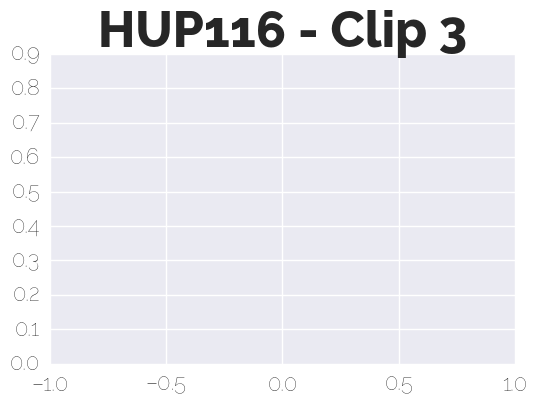

In [12]:
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

fconn = 'lowgamma'
dilate_radius = 0
all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)
all_base_sync = get_norm(all_base_sync)
num_fts = all_base_sync.values()[0].values()[0].shape[0]
skip_chop = True
skip_mayo = False
skip_hup = False

pt_iter = 0

patient_idx = all_base_sync.keys()
out_txt = 'pt_id,' #First column
index_col = []    
outcomex = []
labels = []
all_data = np.array(())
for patient_id in sorted(patient_idx):
        if(skip_chop and 'CHOP' in patient_id):
            continue
        if(skip_mayo and 'Study' in patient_id):
            continue
        if(skip_hup and 'HUP' in patient_id):
            continue
        if not all_base_sync[patient_id]:
            continue
        index_col.append(patient_id)
        row_data = np.array((pt_iter+1,))
        for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):                    
            if(pid != patient_id):
                continue
            outcome = data['PATIENTS'][patient_id]['Outcome']
            
            for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                res = clip_data
                if(res.shape[0] == num_fts+1):
                    res = res[:num_fts]
                try:                
                    all_data = np.hstack((all_data,np.reshape(res,(num_fts,1))))
                except Exception:                
                    all_data = np.reshape(res,(num_fts,1))   
                if(get_outcome(outcome) == 'Good'):        
                    outcomex.append(0)
                else:
                    outcomex.append(1)
                labels.append('%s - Clip %s'%(pid, clip))
outcomex = np.array(outcomex)
labels = np.array(labels)
all_data = all_data.T

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.set_xlim(( -1.0, 1.0))
ax.set_ylim((0, 0.9))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(-1.0,1.0,num_fts)
    y = all_data[i,:]
    line.set_data(x, y)
    if(outcomex[i] == 1):
        line.set_color('red')
    else:
        line.set_color('blue')   
    line.set_alpha(0.2)
    ax.set_title(labels[i])
    return (line,)
# call the animator. blit=True means only re-draw the parts that have changed.
plt.hold(True)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=all_data.shape[0], interval=200, blit=False)
anim
# anim.save('../fig/e01A_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

<h1> Figure 6A. Synchronizability of Time-Varying Functional Networks (across patients)</h1>

{u'HUP111A': {u'1': array([ 0.48373898,  0.3750449 ,  0.41620157,  0.33859119,  0.31725346,
        0.30034221,  0.33391125,  0.4156614 ,  0.31018695,  0.35653777,
        0.28886434,  0.40996685,  0.47440862,  0.40104857,  0.39512678,
        0.36156528,  0.3182949 ,  0.43263537,  0.36084555,  0.40527176,
        0.44444513,  0.40706688,  0.49091966,  0.44086538,  0.37548178,
        0.46108405,  0.27341569,  0.42867448,  0.39260183,  0.37570336,
        0.33339579,  0.40955643,  0.39836719,  0.36285751,  0.35939181,
        0.3773301 ,  0.41554236,  0.2661788 ,  0.37679791,  0.37078982,
        0.35374135,  0.3884574 ,  0.4028581 ,  0.24941918,  0.34509559,
        0.414649  ,  0.41175476,  0.45288191,  0.37354413,  0.47221884,
        0.33930024,  0.39786285,  0.46704649,  0.44191849,  0.31538762,
        0.40890176,  0.3703416 ,  0.40971113,  0.37313787,  0.301678  ,
        0.37627224,  0.35483277,  0.47182395,  0.40284053,  0.37839712,
        0.44773223,  0.31090861,  0.34940214

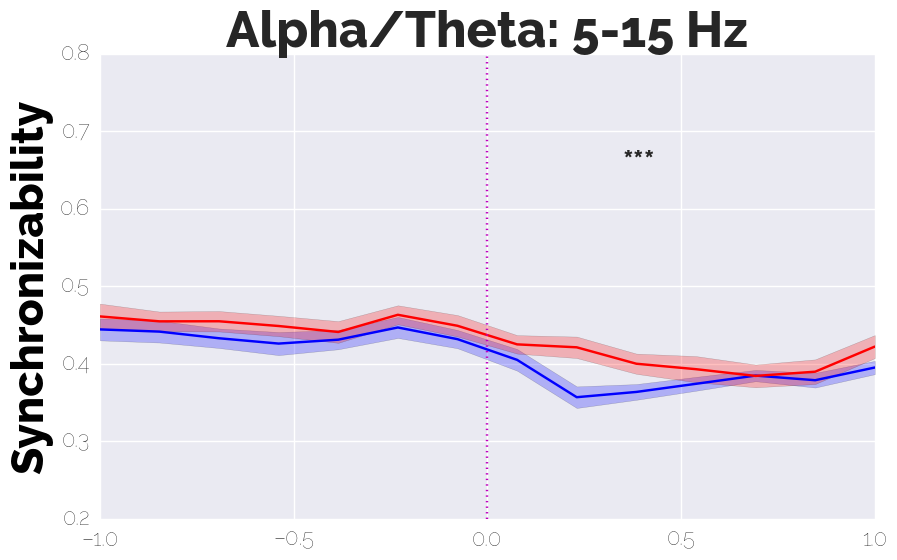

{u'HUP111A': {u'1': array([ 0.50621814,  0.37730021,  0.49772598,  0.35545581,  0.45236463,
        0.39846085,  0.48350671,  0.49793995,  0.42417164,  0.44655991,
        0.4304185 ,  0.48285992,  0.41407786,  0.4443115 ,  0.45317237,
        0.48368976,  0.43980791,  0.45772366,  0.4758182 ,  0.49565778,
        0.42519101,  0.44040219,  0.45639863,  0.45098161,  0.4862108 ,
        0.39426808,  0.51403718,  0.54946307,  0.43760348,  0.48936767,
        0.41079076,  0.42921108,  0.51446329,  0.44392328,  0.32085147,
        0.42798927,  0.44672896,  0.46237235,  0.3761914 ,  0.5205292 ,
        0.45433386,  0.52606894,  0.44540838,  0.42768671,  0.4776412 ,
        0.36001954,  0.47650069,  0.44611389,  0.4041624 ,  0.41055638,
        0.36686388,  0.45887801,  0.38710128,  0.38160744,  0.43386597,
        0.40685903,  0.4508962 ,  0.41146021,  0.46897787,  0.22385966,
        0.41954087,  0.48743892,  0.42914286,  0.40001963,  0.36439597,
        0.41754978,  0.52747435,  0.41608736

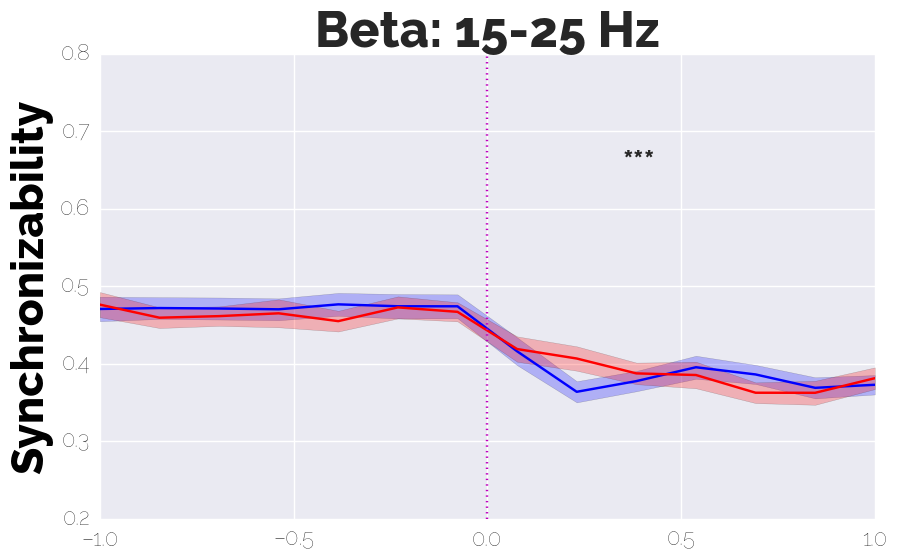

{u'HUP111A': {u'1': array([ 0.50591493,  0.4411673 ,  0.45474315,  0.33881203,  0.50133306,
        0.41859255,  0.52681502,  0.41559599,  0.42318201,  0.4257861 ,
        0.48005017,  0.4206512 ,  0.42620676,  0.40188116,  0.45032698,
        0.4360019 ,  0.44506803,  0.41507255,  0.37115531,  0.44271946,
        0.41261323,  0.44896879,  0.50914831,  0.49397679,  0.48833043,
        0.45002779,  0.48782956,  0.4070815 ,  0.45187546,  0.3942163 ,
        0.44938985,  0.41612827,  0.51046442,  0.53017855,  0.46110471,
        0.40977486,  0.48594348,  0.46309785,  0.45579298,  0.41781005,
        0.48509473,  0.40556225,  0.351421  ,  0.4521488 ,  0.42374494,
        0.46019977,  0.51987333,  0.46018863,  0.41379144,  0.47784096,
        0.48235585,  0.35559311,  0.39427104,  0.3610056 ,  0.45971891,
        0.48346748,  0.50546663,  0.45580413,  0.50162433,  0.31080108,
        0.38433888,  0.46277221,  0.43712124,  0.43571265,  0.479857  ,
        0.42494309,  0.45721779,  0.45465226

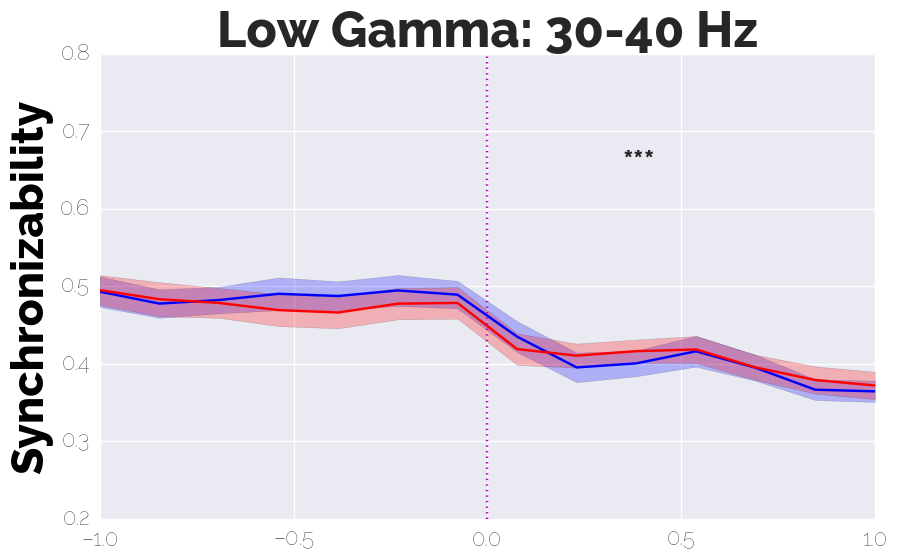

{u'HUP111A': {u'1': array([ 0.43336531,  0.39044058,  0.44021642,  0.18006137,  0.45802599,
        0.51727309,  0.46458106,  0.53933418,  0.44135972,  0.34680005,
        0.43451339,  0.41206788,  0.46669821,  0.42246342,  0.43070594,
        0.4278579 ,  0.39114659,  0.37347315,  0.32772314,  0.37262119,
        0.42871425,  0.38411546,  0.45219198,  0.23641846,  0.4388312 ,
        0.42442838,  0.4002142 ,  0.41280089,  0.27802973,  0.41742013,
        0.43290742,  0.30662456,  0.38120102,  0.48929433,  0.35714295,
        0.43158053,  0.48772074,  0.41310651,  0.43113392,  0.20954582,
        0.349785  ,  0.4069693 ,  0.34371246,  0.51315195,  0.35166954,
        0.36845094,  0.44368249,  0.50222674,  0.42891513,  0.5136062 ,
        0.49535735,  0.5148805 ,  0.2992438 ,  0.23525915,  0.50743151,
        0.49575251,  0.45380295,  0.45456035,  0.43618463,  0.35523645,
        0.36438242,  0.39721628,  0.40508841,  0.40061556,  0.48976685,
        0.55465804,  0.5789838 ,  0.46298166

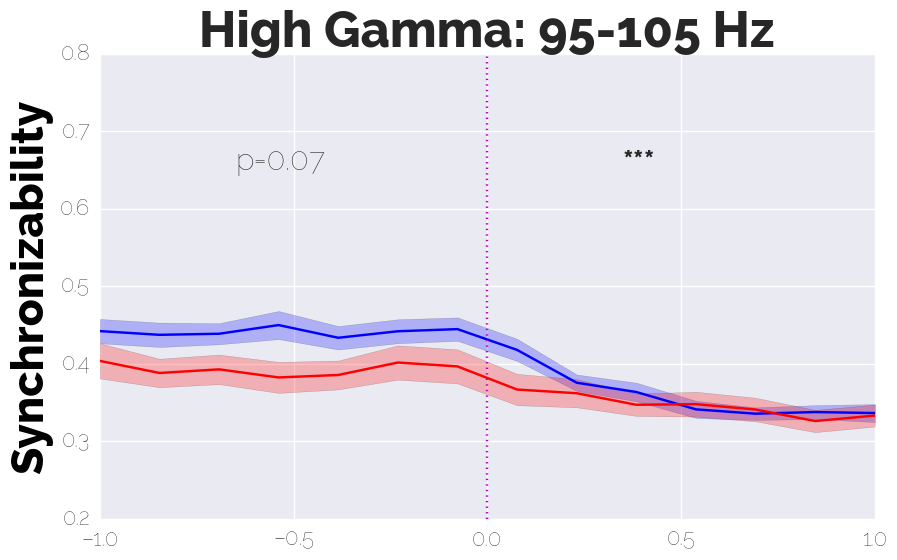

{u'HUP111A': {u'1': array([ 0.6461252 ,  0.4928716 ,  0.56969222,  0.34180115,  0.59656329,
        0.63092706,  0.63008152,  0.60747118,  0.5711025 ,  0.59018067,
        0.58172962,  0.57927136,  0.54573293,  0.55842248,  0.6107076 ,
        0.55096361,  0.59896924,  0.58238379,  0.52512791,  0.61873106,
        0.63145168,  0.52274356,  0.54470623,  0.69100476,  0.61283145,
        0.51344011,  0.63092335,  0.54658334,  0.6558301 ,  0.65880961,
        0.48521151,  0.63962099,  0.56696957,  0.67267142,  0.51669346,
        0.60969842,  0.70283966,  0.59584778,  0.41446743,  0.47835803,
        0.43532187,  0.51862688,  0.48450463,  0.63185765,  0.55082086,
        0.4928587 ,  0.63023785,  0.59134584,  0.5528936 ,  0.67795622,
        0.60704629,  0.53247575,  0.35469228,  0.31024513,  0.72291926,
        0.65412593,  0.57262435,  0.59694242,  0.5440341 ,  0.48205089,
        0.4807237 ,  0.68447955,  0.58450341,  0.54702766,  0.62831139,
        0.60968242,  0.61984906,  0.68863333

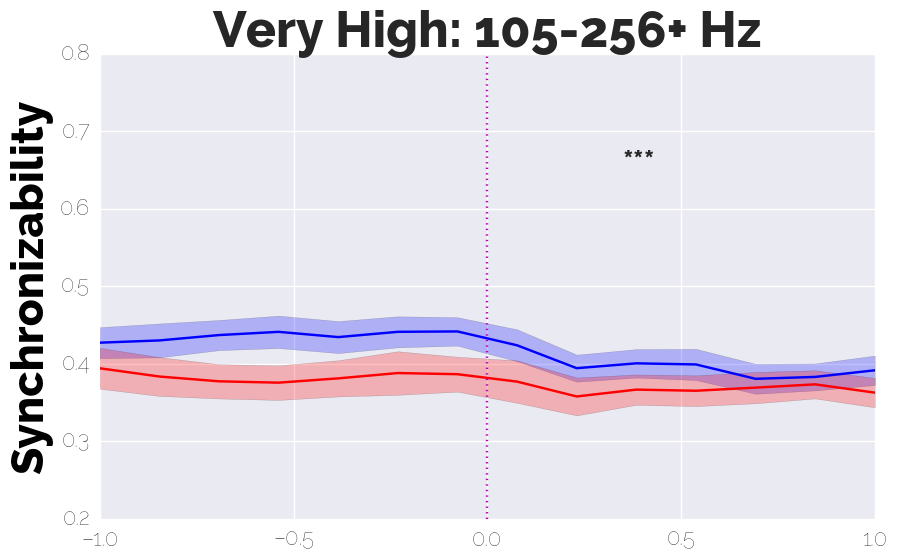

{u'HUP111A': {u'1': array([ 0.60307714,  0.5954893 ,  0.64356572,  0.42993525,  0.51631087,
        0.45911878,  0.54714061,  0.57576843,  0.44690835,  0.51246651,
        0.58916709,  0.46587231,  0.63611857,  0.58121133,  0.54452173,
        0.51973672,  0.53397268,  0.63144125,  0.54507852,  0.57403566,
        0.63321861,  0.59733228,  0.61309208,  0.57314877,  0.49515075,
        0.55279446,  0.57259775,  0.62086608,  0.49231181,  0.57289943,
        0.60545131,  0.55776313,  0.61790553,  0.47747019,  0.4870814 ,
        0.6194359 ,  0.69092458,  0.58299859,  0.47368411,  0.50539506,
        0.53728859,  0.61372554,  0.57826912,  0.54447364,  0.51506567,
        0.564116  ,  0.40611054,  0.70873584,  0.59547178,  0.59819581,
        0.53607688,  0.58589023,  0.43209041,  0.60517213,  0.46888809,
        0.6014284 ,  0.65377075,  0.59935933,  0.66000344,  0.51393553,
        0.59595524,  0.57773161,  0.69400295,  0.60000359,  0.48479234,
        0.61598604,  0.54293294,  0.62902386

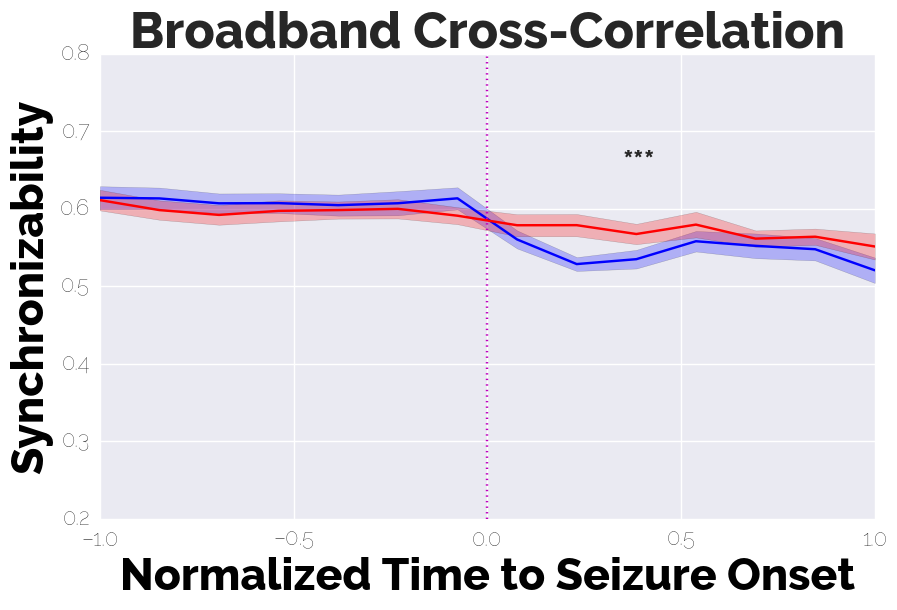

In [13]:
width = -1
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)        
    print all_base_sync
    all_base_sync = get_norm(all_base_sync, width=width)
    
    width = len(map(lambda x: x.values(), all_base_sync.values())[0][0])
    num_fts = width

    pt_iter = 0
    patient_idx = all_base_sync.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_base_sync.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_base_sync[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            row_data = np.array((pt_iter+1,))    
            for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):                    
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome']

                avg_data = np.array(())                    
                for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                    res = clip_data                        
                    if(res.shape[0] == num_fts+1):
                        res = res[:num_fts]
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                    except Exception:                
                        avg_data = np.reshape(res,(num_fts,1))                    
#                 avg_data = np.nanmedian(avg_data,axis=1)
                avg_data = np.nanmean(avg_data,axis=1)

                # Update row_data
                row_data = np.hstack((row_data,avg_data)) 

                # Update header
                if(pt_iter == 0):
                    for t in range(1,num_fts+1):
                        out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
            if(get_outcome(outcome) == 'Good'):        
                row_data = np.hstack((row_data,[0]))        
            else:
                row_data = np.hstack((row_data,[1]))
            if(row_data.shape[0] != num_fts+2):
                continue
            ft_matrix[pt_iter,:] = row_data
            pt_iter += 1
    
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')
    # good_outcome_data_err_low = np.nanpercentile(good_outcome_data,2.5,axis=0)
    # good_outcome_data_err_high = np.nanpercentile(good_outcome_data,97.5,axis=0)


    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')
    # poor_outcome_data_err_low = np.nanpercentile(poor_outcome_data,2.5,axis=0)
    # poor_outcome_data_err_high = np.nanpercentile(poor_outcome_data,97.5,axis=0)
    
    font = {'family' : 'Raleway',
        'weight' : 'normal',
        'size'   : 20}
    matplotlib.rc('font', **font)
    matplotlib.rcParams['axes.titlesize'] = 36
    matplotlib.rcParams['axes.titleweight'] = 'bold'
    matplotlib.rcParams['axes.labelsize'] = 32
    matplotlib.rcParams['axes.labelweight'] = 'bold'
    matplotlib.rcParams['ytick.labelsize'] = 16
    matplotlib.rcParams['xtick.labelsize'] = 16
    matplotlib.rcParams['axes.labelcolor'] = 'black'

    plt.figure(dpi=1200,figsize=(10,6))
#     plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0),'b')
    plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmean(good_outcome_data,axis=0),'b')
    plt.hold(True)
#     plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0)-good_outcome_data_err,np.nanmedian(good_outcome_data,axis=0)+good_outcome_data_err,facecolor='blue',alpha=0.25)
    plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmean(good_outcome_data,axis=0)-good_outcome_data_err,np.nanmean(good_outcome_data,axis=0)+good_outcome_data_err,facecolor='blue',alpha=0.25)
    # plt.fill_between(np.linspace(-1.0,1.0,num_fts),good_outcome_data_err_low,good_outcome_data_err_high,facecolor='blue',alpha=0.25)
#     plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0), 'r')
    plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmean(poor_outcome_data,axis=0), 'r')
#     plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0)-poor_outcome_data_err,np.nanmedian(poor_outcome_data,axis=0)+poor_outcome_data_err,facecolor='red',alpha=0.25)
    plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmean(poor_outcome_data,axis=0)-poor_outcome_data_err,np.nanmean(poor_outcome_data,axis=0)+poor_outcome_data_err,facecolor='red',alpha=0.25)
    # plt.fill_between(np.linspace(-1.0,1.0,num_fts),poor_outcome_data_err_low,poor_outcome_data_err_high,facecolor='red',alpha=0.25)
    plt.xlim(( -1.0, 1.0))    
    plt.ylim((0.2, 0.8))
    plt.plot([0,0],[0.2,0.8],color='m',linestyle=':')
    plt.yticks(np.arange(0.2,0.8,0.1))
    plt.title(title)
    if fconn == 'broadband_CC':
        plt.xlabel('Normalized Time to Seizure Onset')
    plt.ylabel('Synchronizability')
    plt.grid(True)
    
    # Make significance indicators
#     fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:width/4.0*3.0],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))    
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:width/4.0*3.0],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    pre_p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    post_p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    if pre_p < 0.001:
        plt.text(-0.65,0.65, '***',{'weight':'bold', 'size':22})
    elif pre_p < 0.01:
        plt.text(-0.65,0.65, '**',{'weight':'bold', 'size':22})
    elif pre_p < 0.05:
        plt.text(-0.65,0.65, '*',{'weight':'bold', 'size':22})
    elif pre_p < 0.1:
        plt.text(-0.65,0.65, 'p=%0.2f'%pre_p,{'weight':'normal', 'size':22})
    
    if post_p < 0.001:
        plt.text(0.35,0.65, '***',{'weight':'bold', 'size':22})
    elif post_p < 0.01:
        plt.text(0.35,0.65, '**',{'weight':'bold', 'size':22})
    elif post_p < 0.05:
        plt.text(0.35,0.65, '*',{'weight':'bold', 'size':22})
    elif post_p < 0.1:
        plt.text(0.35,0.65, 'p=%0.2f'%post_p,{'weight':'normal', 'size':22})
#     plt.show()
    print pre_p, post_p, roc_auc
#     plt.savefig('../../fig/Figure6A_%s.svg'%fconn,bbox_inches='tight', format='svg', dpi=1200)
    plt.show()

In [14]:
width = -1
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)        
    all_base_sync = get_norm(all_base_sync, width=width)
    width = len(map(lambda x: x.values(), all_base_sync.values())[0][0])
    num_fts = width

    pt_iter = 0
    patient_idx = all_base_sync.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_base_sync.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_base_sync[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            row_data = np.array((pt_iter+1,))    
            for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):                    
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome']

                avg_data = np.array(())                    
                for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                    res = clip_data                        
                    if(res.shape[0] == num_fts+1):
                        res = res[:num_fts]
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                    except Exception:                
                        avg_data = np.reshape(res,(num_fts,1))                    
                avg_data = np.nanmedian(avg_data,axis=1)

                # Update row_data
                row_data = np.hstack((row_data,avg_data)) 

                # Update header
                if(pt_iter == 0):
                    for t in range(1,num_fts+1):
                        out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
            if(get_outcome(outcome) == 'Good'):        
                row_data = np.hstack((row_data,[0]))        
            else:
                row_data = np.hstack((row_data,[1]))
            if(row_data.shape[0] != num_fts+2):
                continue
            ft_matrix[pt_iter,:] = row_data
            pt_iter += 1

    ft_matrix = np.array(ft_matrix)
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))
    df_outcome = pd.DataFrame(outcomex)
    df_feat = pd.DataFrame(np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))
    df_outcome.to_csv('../../tmp/Table2_e01A_%s_outcome.csv'%(fconn))
    df_feat.to_csv('../../tmp/Table2_e01A_%s_feat.csv'%(fconn))
    roc_auc = auc(fpr,tpr)
    print roc_auc
    p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    print fconn,'pre',p
    p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    print fconn,'seizure',p
    

0.55
alphatheta pre 0.1339
alphatheta seizure 0.0
0.573076923077
beta pre 0.8879
beta seizure 0.0
0.592307692308
lowgamma pre 0.9589
lowgamma seizure 0.0
0.730769230769
highgamma pre 0.118
highgamma seizure 0.0
0.661538461538
veryhigh pre 0.2014
veryhigh seizure 0.0
0.753846153846
broadband_CC pre 0.5975
broadband_CC seizure 0.0


<h1>Figure NULL. Synchronizability of Time-Varying Functional Networks (averaged across individual seizures) </h1>

In [15]:
width = -1
all_features = []
roc_results = []
for fconn in ['lowgamma']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_base_sync = gather_base_sync_results(dilate_radius,fconn)
    all_base_sync = get_norm(all_base_sync, width=width)
    width = len(map(lambda x: x.values(), all_base_sync.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_base_sync.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    
    clip_labels = []
    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_base_sync[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):                    
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome']              
                # Create entry for each subtype
                for subtype in ['A', 'B', 'C', 'D']:
                    avg_data = np.array(())
                    for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                        stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                        if stype != subtype:
                            continue
                        res = clip_data                        
                        if(res.shape[0] == num_fts+1):
                            res = res[:num_fts]
                        try:                
                            avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                        except Exception:                
                            avg_data = np.reshape(res,(num_fts,1))                    
                    if patient_id == 'HUP107' and subtype == 'C':
                        print avg_data
                    # Check if subtype exists
                    if avg_data.shape[0] == 0:
                        continue
                    
                    #%DEBUG
#                     print patient_id, clip, avg_data.shape
                    avg_data = np.nanmedian(avg_data,axis=1)
    
                    # Update row_data
                    row_data = np.append([clip_iter+1],avg_data)
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    # Update header
                    if(clip_iter == 0):
                        for t in range(1,num_fts+1):
                            out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                    if(get_outcome(outcome) == 'Good'):        
                        row_data = np.append(row_data,[0])        
                    else:
                        row_data = np.append(row_data,[1])
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    try:
                        all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                    except Exception:
                        all_data = row_data
                    clip_iter += 1
                    clip_labels.append(patient_id+subtype)
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
    res= zip(clip_labels,np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))
    open('../../fig/tmp.csv','w').write('\n'.join(map(lambda x: '%s,%0.8f'%(x[0],x[1]),res)))

print res

[[ 0.64158163]
 [ 0.66118084]
 [ 0.58002026]
 [ 0.63971178]
 [ 0.6440488 ]
 [ 0.63623018]
 [ 0.63748126]
 [ 0.54861234]
 [ 0.43079059]
 [ 0.48240206]
 [ 0.50401217]
 [ 0.54108242]
 [ 0.59154515]
 [ 0.56868761]]
[(u'HUP064A', -0.11160013907927069), (u'HUP065A', -0.028549640403555232), (u'HUP068A', -0.19585509158174746), (u'HUP068B', -0.23540147447280557), (u'HUP070A', -0.16364324511212669), (u'HUP073A', 0.037349547459437804), (u'HUP073B', -0.0022755021699811806), (u'HUP074A', -0.098479937718516652), (u'HUP074B', -0.079793511663789507), (u'HUP075A', -0.16050677876074432), (u'HUP078A', -0.092167873464380434), (u'HUP080A', -0.20871589755272596), (u'HUP082A', -0.050863086088092535), (u'HUP082B', -0.095776876236721098), (u'HUP082C', 0.013808782761749128), (u'HUP083A', -0.02778352004109319), (u'HUP083B', -0.031409906959474709), (u'HUP083C', -0.16119551578290514), (u'HUP083D', -0.10187842417066578), (u'HUP086A', -0.13419832894986528), (u'HUP087A', -0.11867116917282672), (u'HUP088A', -0.2024569

HUP064 1.4
HUP065 1.2
HUP068 1.1
HUP068 1.1
HUP070 1.2
HUP073 1.3
HUP073 1.3
HUP074 1.1
HUP074 1.1
HUP075 2.4
HUP078 2.1
HUP080 2.2
HUP082 1.1
HUP082 1.1
HUP082 1.1
HUP083 2.1
HUP083 2.1
HUP083 2.1
HUP083 2.1
HUP086 1.3
HUP087 1.4
HUP088 1.4
HUP088 1.4
HUP088 1.4
HUP094 1.2
HUP105 1.1
HUP105 1.1
HUP106 1.2
HUP106 1.2
HUP106 1.2
HUP107 1.1
HUP107 1.1
HUP107 1.1
HUP111A 1.2
HUP111B 1.2
HUP111B 1.2
HUP116 1.1
HUP116 1.1
HUP116 1.1
Study004 ILAE4
Study004 ILAE4
Study012 ILAE1
Study012 ILAE1
Study012 ILAE1
Study012 ILAE1
Study016 ILAE4
Study016 ILAE4
Study016 ILAE4
Study016 ILAE4
Study017 ILAE4
Study017 ILAE4
Study017 ILAE4
Study019 ILAE5
Study019 ILAE5
Study022 ILAE5
Study022 ILAE5
Study026 ILAE1
Study028 ILAE4
Study029 ILAE5
Study033 ILAE5
0.002 0.0
HUP064 1.4
HUP065 1.2
HUP068 1.1
HUP068 1.1
HUP070 1.2
HUP073 1.3
HUP073 1.3
HUP074 1.1
HUP074 1.1
HUP075 2.4
HUP078 2.1
HUP080 2.2
HUP082 1.1
HUP082 1.1
HUP082 1.1
HUP083 2.1
HUP083 2.1
HUP083 2.1
HUP083 2.1
HUP086 1.3
HUP087 1.4
HUP088 1.4
H

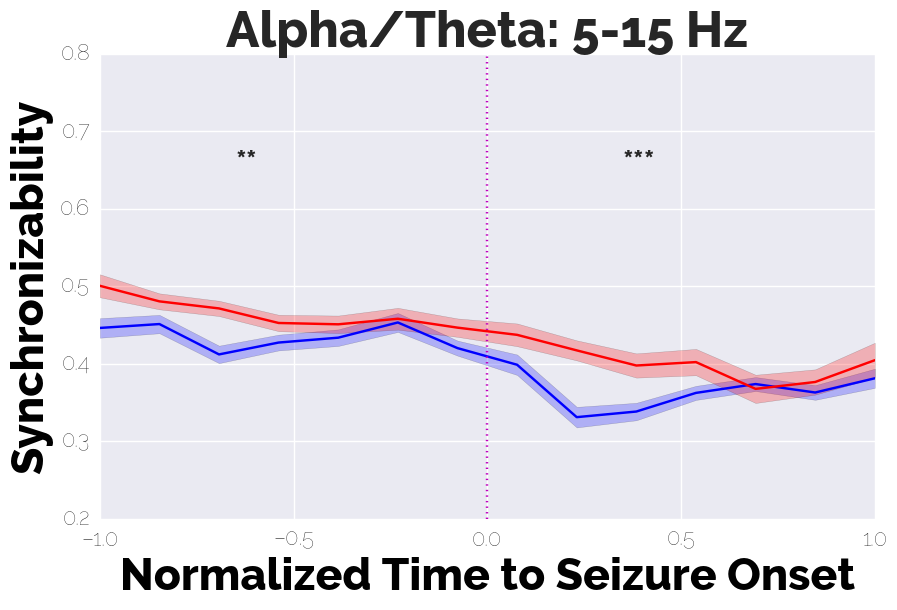

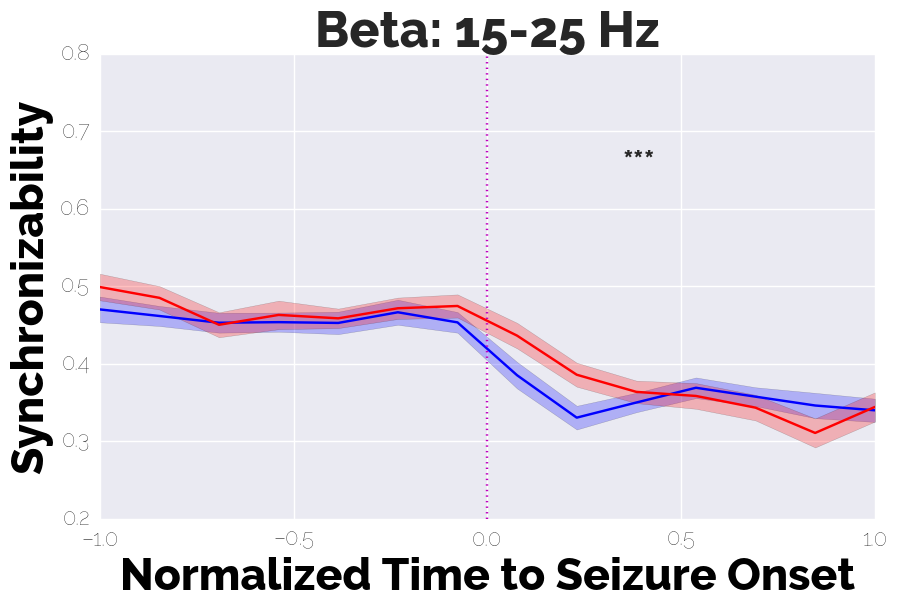

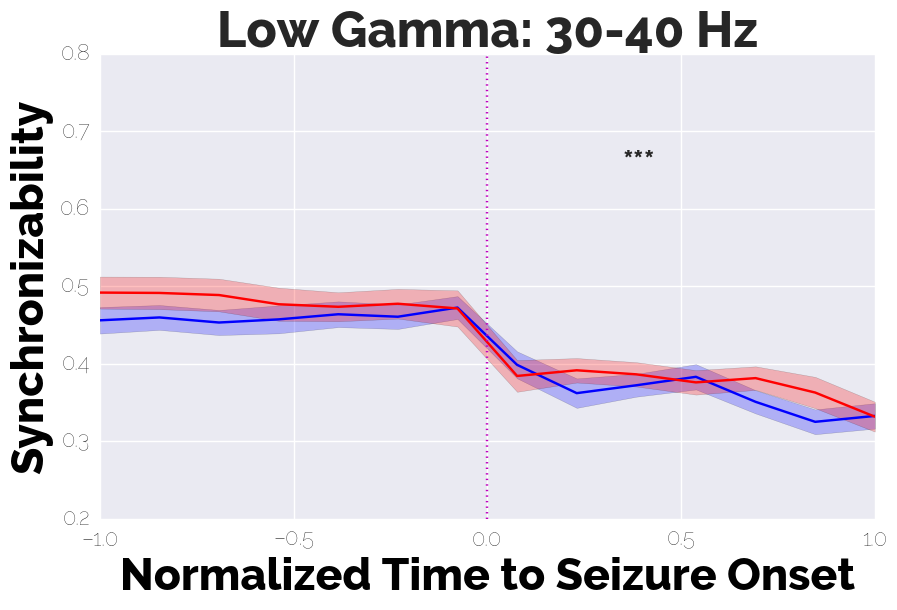

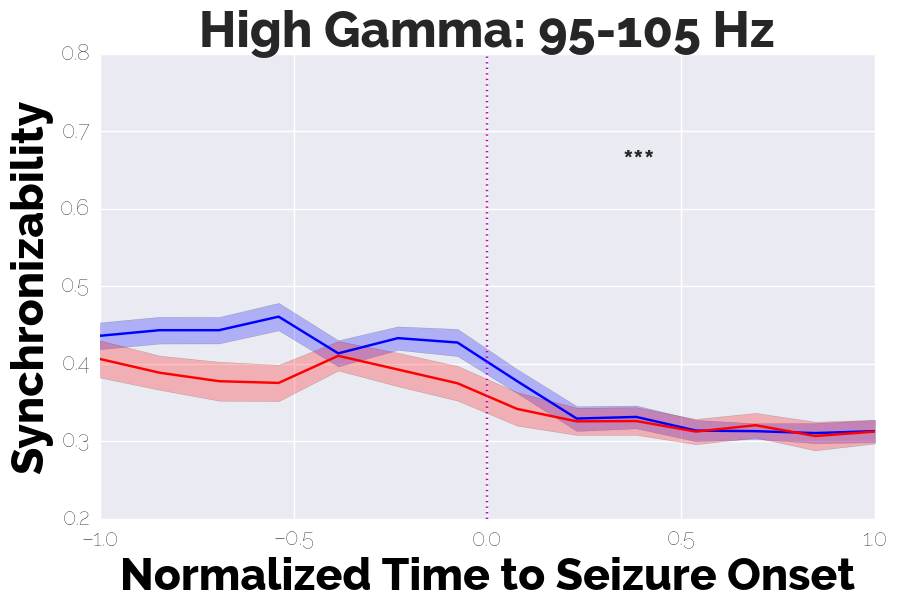

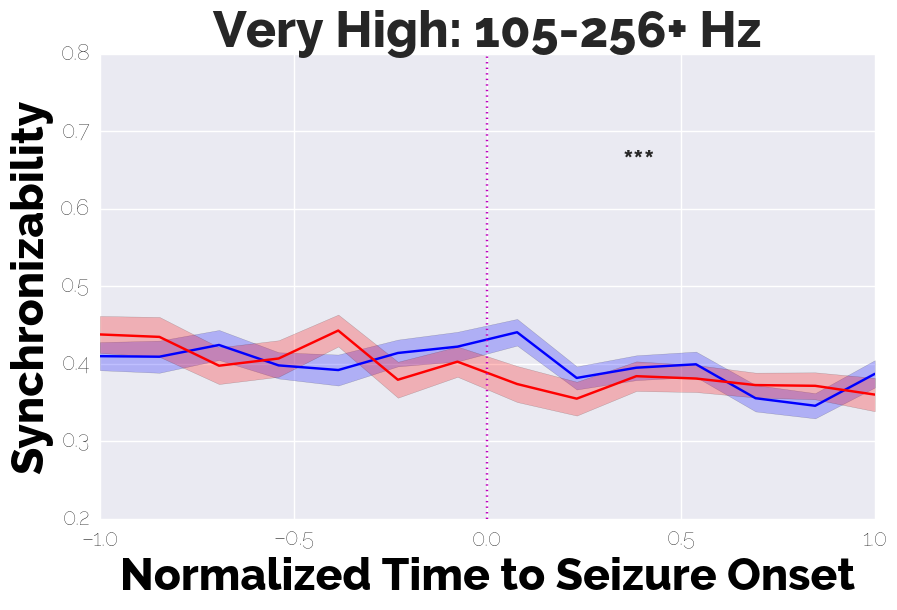

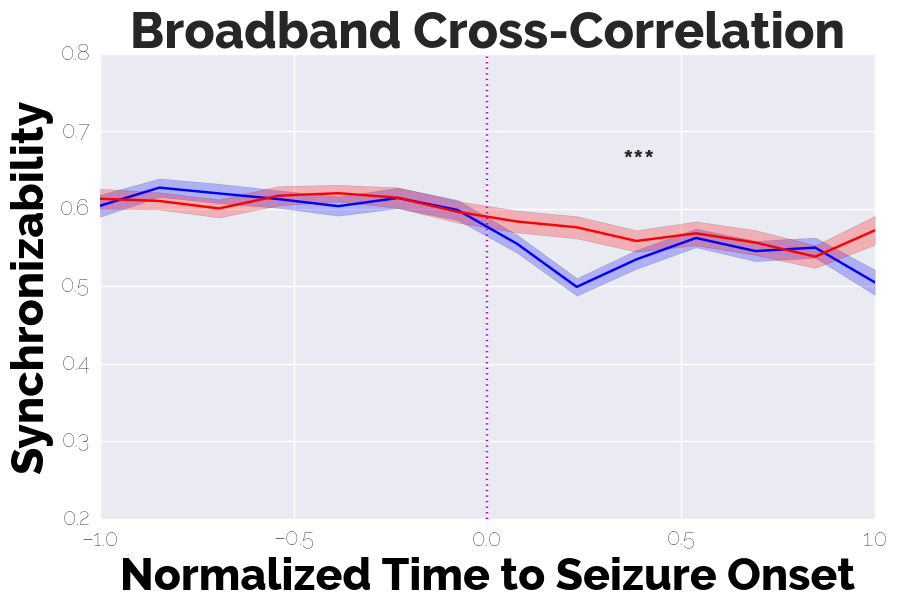

In [16]:
width = -1
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)
    all_base_sync = get_norm(all_base_sync, width=width)
    width = len(map(lambda x: x.values(), all_base_sync.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_base_sync.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_base_sync.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    
    
    all_data = np.array(())

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_base_sync[patient_id]:
                continue
#             print patient_id
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome'] 
                
                # Create entry for each subtype
                for subtype in ['A', 'B', 'C', 'D']:
                    avg_data = np.array(())
                    for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                        stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                        if stype != subtype:
                            continue
                        res = clip_data                        
                        if(res.shape[0] == num_fts+1):
                            res = res[:num_fts]
                        try:                
                            avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                        except Exception:                
                            avg_data = np.reshape(res,(num_fts,1))                    
                    # Check if subtype exists
                    if avg_data.shape[0] == 0:
                        continue
                    
                    #%DEBUG
#                     print patient_id, clip, avg_data.shape
                    avg_data = np.nanmedian(avg_data,axis=1)
                        
                    # Update row_data
                    row_data = np.append([clip_iter+1],avg_data)
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    # Update header
                    if(clip_iter == 0):
                        for t in range(1,num_fts+1):
                            out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                    print patient_id, outcome
                    if(get_outcome(outcome) == 'Good'):        
                        row_data = np.append(row_data,[0])        
                    else:
                        row_data = np.append(row_data,[1])
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    try:
                        all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                    except Exception:
                        all_data = row_data
                    clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')
    # good_outcome_data_err_low = np.nanpercentile(good_outcome_data,2.5,axis=0)
    # good_outcome_data_err_high = np.nanpercentile(good_outcome_data,97.5,axis=0)


    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')
    # poor_outcome_data_err_low = np.nanpercentile(poor_outcome_data,2.5,axis=0)
    # poor_outcome_data_err_high = np.nanpercentile(poor_outcome_data,97.5,axis=0)
    font = {'family' : 'Raleway',
        'weight' : 'normal',
        'size'   : 20}
    matplotlib.rc('font', **font)
    matplotlib.rcParams['axes.titlesize'] = 36
    matplotlib.rcParams['axes.titleweight'] = 'bold'
    matplotlib.rcParams['axes.labelsize'] = 32
    matplotlib.rcParams['axes.labelweight'] = 'bold'
    matplotlib.rcParams['ytick.labelsize'] = 16
    matplotlib.rcParams['xtick.labelsize'] = 16
    matplotlib.rcParams['axes.labelcolor'] = 'black'
    
    plt.figure(dpi=1200,figsize=(10,6))
    plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0),'b')
    plt.hold(True)
    plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0)-good_outcome_data_err,np.nanmedian(good_outcome_data,axis=0)+good_outcome_data_err,facecolor='blue',alpha=0.25)
    # plt.fill_between(np.linspace(-1.0,1.0,num_fts),good_outcome_data_err_low,good_outcome_data_err_high,facecolor='blue',alpha=0.25)
    plt.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0), 'r')
    plt.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0)-poor_outcome_data_err,np.nanmedian(poor_outcome_data,axis=0)+poor_outcome_data_err,facecolor='red',alpha=0.25)
    # plt.fill_between(np.linspace(-1.0,1.0,num_fts),poor_outcome_data_err_low,poor_outcome_data_err_high,facecolor='red',alpha=0.25)
    plt.xlim(( -1.0, 1.0))    
    plt.ylim((0.2, 0.8))
    plt.plot([0,0],[0.2,0.8],color='m',linestyle=':')
    plt.yticks(np.arange(0.2,0.8,0.1))
    plt.title(title)
    plt.xlabel('Normalized Time to Seizure Onset')
    plt.ylabel('Synchronizability')
    plt.grid(True)
    
    # Make significance indicators
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    pre_p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    post_p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    if pre_p < 0.001:
        plt.text(-0.65,0.65, '***',{'weight':'bold', 'size':22})
    elif pre_p < 0.01:
        plt.text(-0.65,0.65, '**',{'weight':'bold', 'size':22})
    elif pre_p < 0.05:
        plt.text(-0.65,0.65, '*',{'weight':'bold', 'size':22})
    elif pre_p < 0.1:
        plt.text(-0.65,0.65, 'p=%0.2f'%pre_p,{'weight':'normal', 'size':22})
    
    if post_p < 0.001:
        plt.text(0.35,0.65, '***',{'weight':'bold', 'size':22})
    elif post_p < 0.01:
        plt.text(0.35,0.65, '**',{'weight':'bold', 'size':22})
    elif post_p < 0.05:
        plt.text(0.35,0.65, '*',{'weight':'bold', 'size':22})
    elif post_p < 0.1:
        plt.text(0.35,0.65, 'p=%0.2f'%post_p,{'weight':'normal', 'size':22})
#     plt.show()
    print pre_p, post_p
#     plt.savefig('../../fig/Figure6A_%s.svg'%fconn,bbox_inches='tight', format='svg', dpi=1200)

In [17]:
width = -1
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)
    all_base_sync = get_norm(all_base_sync, width=width)
    width = len(map(lambda x: x.values(), all_base_sync.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_base_sync.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_base_sync.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    
    
    all_data = np.array(())

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_base_sync[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome'] 
                
                # Create entry for each subtype
                for subtype in ['A', 'B', 'C', 'D']:
                    avg_data = np.array(())
                    for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                        stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                        if stype != subtype:
                            continue
                        res = clip_data                        
                        if(res.shape[0] == num_fts+1):
                            res = res[:num_fts]
                        try:                
                            avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                        except Exception:                
                            avg_data = np.reshape(res,(num_fts,1))                    
                    # Check if subtype exists
                    if avg_data.shape[0] == 0:
                        continue
                    
                    #%DEBUG
#                     print patient_id, clip, avg_data.shape
                    avg_data = np.nanmedian(avg_data,axis=1)
                        
                    # Update row_data
                    row_data = np.append([clip_iter+1],avg_data)
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    # Update header
                    if(clip_iter == 0):
                        for t in range(1,num_fts+1):
                            out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                    if(get_outcome(outcome) == 'Good'):        
                        row_data = np.append(row_data,[0])        
                    else:
                        row_data = np.append(row_data,[1])
                    row_data = np.reshape(row_data, (row_data.shape[0],1))
                    try:
                        all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                    except Exception:
                        all_data = row_data
                    clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    print roc_auc

    p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    print fconn,'pre',p
    p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    print fconn,'seizure',p

0.534665099882
alphatheta pre 0.0024
alphatheta seizure 0.0
0.567567567568
beta pre 0.6198
beta seizure 0.0
0.601645123384
lowgamma pre 0.815
lowgamma seizure 0.0
0.65687426557
highgamma pre 0.1038
highgamma seizure 0.0
0.573443008226
veryhigh pre 0.3804
veryhigh seizure 0.0
0.690951821387
broadband_CC pre 0.4847
broadband_CC seizure 0.0


<h1> Figure 7A. Change in synchronizability as a feature </h1>

alphatheta -0.478969482019 0.63196033949
beta -0.700032319874 0.483907120659
lowgamma -0.88425135142 0.376560543363
highgamma -2.21062837855 0.0270615819116
highgamma -2.21062837855 0.0270615819116
veryhigh -1.54743986499 0.121757214624
broadband_CC -2.43169121641 0.0150285133018
broadband_CC -2.43169121641 0.0150285133018


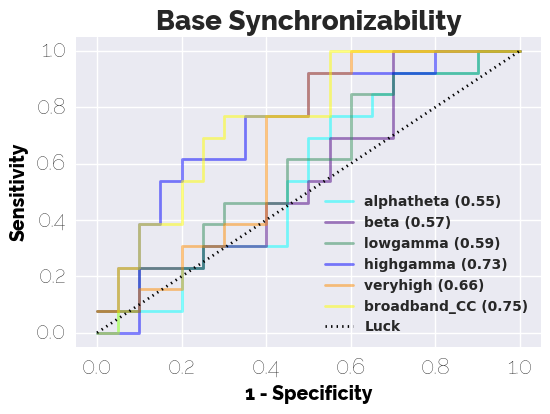

In [18]:
fig,axs = plt.subplots(1,1)
ax = axs
fig.set_size_inches((6,4))

width = -1
all_features = []
roc_results = []
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)
    all_base_sync = get_norm(all_base_sync, width=width)
    width = len(map(lambda x: x.values(), all_base_sync.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_base_sync.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_base_sync.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    
    
    all_data = np.array(())

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_base_sync[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome'] 
                
                avg_data = np.array(())
                for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                    res = clip_data                        
                    if(res.shape[0] == num_fts+1):
                        res = res[:num_fts]
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                    except Exception:                
                        avg_data = np.reshape(res,(num_fts,1))                    
                #%DEBUG
#                     print patient_id, clip, avg_data.shape
                avg_data = np.nanmedian(avg_data,axis=1)

                # Update row_data
                row_data = np.append([clip_iter+1],avg_data)
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                # Update header
                if(clip_iter == 0):
                    for t in range(1,num_fts+1):
                        out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                if(get_outcome(outcome) == 'Good'):        
                    row_data = np.append(row_data,[0])        
                else:
                    row_data = np.append(row_data,[1])
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                try:
                    all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                except Exception:
                    all_data = row_data
                clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
    good_outcome_feature = np.nanmean(all_data[outcomex==0,width/2:],axis=1)-np.nanmean(all_data[outcomex==0,:width/2],axis=1)
    poor_outcome_feature = np.nanmean(all_data[outcomex==1,width/2:],axis=1)-np.nanmean(all_data[outcomex==1,:width/2],axis=1)
    all_features.append(good_outcome_feature)
    all_features.append(poor_outcome_feature)
    s,p = scipy.stats.ranksums(good_outcome_feature, poor_outcome_feature)
    print fconn, s,p
    if p < 0.05:
        print fconn, s,p
    
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmean(all_data[:,width/2:],axis=1)-np.nanmean(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    roc_results.append((fconn,roc_auc,fpr,tpr))
    
# ax.boxplot(all_features)

# ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
# ax.set_xticklabels(['Good','Poor','Good','Poor','Good','Poor','Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
# ax.set_ylim([-0.3,0.05])
# for ii in range(1,10,2):
#     ax.get_xticklabels()[ii].set_color('black')
# for ii in range(0,10,2):
#     ax.get_xticklabels()[ii].set_color('darkgray')
# ax.text(0.75,-0.25,'Alpha/Theta:\n 5-15 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(2.75,-0.25,'Beta:\n 15-25 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(4.75,-0.25,'Low Gamma:\n 30-40 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(6.75,-0.25,'High Gamma:\n 95-105 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(8.75,-0.25,'Broadband\n Cross-\nCorrelation',fontdict={'size':10,'weight':'normal'})
# ax.set_ylabel('Change in Synchronizability \n(pre-ictal to ictal)',fontdict={'size':14,'weight':'bold'})

# ax = axs[1]
colors = ['cyan', 'indigo', 'seagreen', 'blue', 'darkorange', 'yellow']
i = 0
for fconn, roc_auc, fpr, tpr in roc_results:
    ax.plot(fpr, tpr, lw=2, color=colors[i], linestyle='-', label = '%s (%0.2f)'%(fconn,roc_auc), alpha=0.5)
    ax.hold(True)
    i += 1
# Plot the ROC curve for luck along with area
ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='k', label='Luck')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])

ax.set_xlabel('1 - Specificity',fontdict={'size':14,'weight':'bold'})
ax.set_ylabel('Sensitivity',fontdict={'size':14,'weight':'bold'})
ax.legend(loc="lower right",prop={'size':10,'weight':'bold', 'family':'normal'})

plt.title('Base Synchronizability',fontdict={'size':20})
plt.savefig('../../fig/Figure7A.svg',bbox_inches='tight', format='svg', dpi=1200)

<h1>Figure S7. Distribution of synchronizability </h1>

In [19]:
skip_chop = True
skip_mayo = False
skip_hup = False
dilate_radius = 0

all_base_sync = gather_base_sync_results(dilate_radius,'highgamma', skip_chop, skip_mayo)

PATIENT_IDX = sorted(all_base_sync.keys())
comp_dir = os.path.expanduser(data['COMP_DIR'])

# Collect data
# Initialize boxplot arrays
good_pre_res = {}
good_res = {}
poor_pre_res = {}
poor_res = {}

for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    # All results
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)
    try:
        good_pre_res[fconn]        
    except KeyError:
        good_pre_res[fconn] = []
        good_res[fconn] = []
        poor_pre_res[fconn] = []
        poor_res[fconn] = []
    for patient_id in PATIENT_IDX:
        if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
            continue
        if patient_id == 'HUP111A':
            continue
        # Get outcome
        outcome = data['PATIENTS'][patient_id]['Outcome']
        outcome = get_outcome(outcome)
        pre_res = []
        pre_non_res = []
        res = []
        non_res = []
        
        # Get resected nodes and non-resected nodes
        first_clip_id = data['PATIENTS'][patient_id]['Events']['Ictal'].keys()[0]
        base_sync = all_base_sync[patient_id][first_clip_id]

        if outcome == 'Good':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id == '1000':
                    continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    base_sync = all_base_sync[patient_id][clip_id]
                except KeyError:
                    continue

                base_sync = base_sync[:base_sync.shape[0]/2]
                mean_base_sync = np.nanmedian(base_sync)
                
                pre_res.append(mean_base_sync)
    
                try:
                    base_sync = all_base_sync[patient_id][clip_id]
                except KeyError:
                    continue

                base_sync = base_sync[base_sync.shape[0]/2:]
                mean_base_sync = np.nanmedian(base_sync)
                
                res.append(mean_base_sync)

            good_pre_res[fconn].append(np.nanmedian(pre_res))
            good_res[fconn].append(np.nanmedian(res))
        if outcome == 'Poor':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id == '1000':
                    continue
#                 print patient_id, clip_id
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    base_sync = all_base_sync[patient_id][clip_id]
                except KeyError:
                    continue

                base_sync = base_sync[:base_sync.shape[0]/2]
                mean_base_sync = np.nanmedian(base_sync)

                pre_res.append(mean_base_sync)
    
                try:
                    base_sync = all_base_sync[patient_id][clip_id]
                except KeyError:
                    continue
                
                base_sync = base_sync[base_sync.shape[0]/2:]
                mean_base_sync = np.nanmedian(base_sync)
                
                res.append(mean_base_sync)
            poor_pre_res[fconn].append(np.nanmedian(pre_res))
            poor_res[fconn].append(np.nanmedian(res))
           


Alpha/Theta:
 5-15 Hz pre -0.305762469592 0.759785505665 -0.232973866157
Alpha/Theta:
 5-15 Hz post -0.540964369279 0.588532141899 -0.266042590289
Beta:
 15-25 Hz pre -0.446883609404 0.654959098972 -0.10743992078
Beta:
 15-25 Hz post -0.729125889028 0.465924659585 -0.262058341077
Low Gamma:
 30-40 Hz pre 0.0235201899686 0.981235333673 0.0566556927061
Low Gamma:
 30-40 Hz post -0.16464132978 0.869226298639 -0.133003375645
High Gamma:
 95-105 Hz pre 1.71697386771 0.0859839468186 0.573950793901
High Gamma:
 95-105 Hz post 1.66993348777 0.0949325238434 0.312783813956
Very High:
 105-256+ Hz pre 0.729125889028 0.465924659585 0.364060160205
Very High:
 105-256+ Hz post 1.01136816865 0.31184025033 0.416975027222
Broadband
 Cross-Correlation pre 0.964327788714 0.334881613081 0.442141262114
Broadband
 Cross-Correlation post -0.588004749216 0.556529105076 -0.25637106874


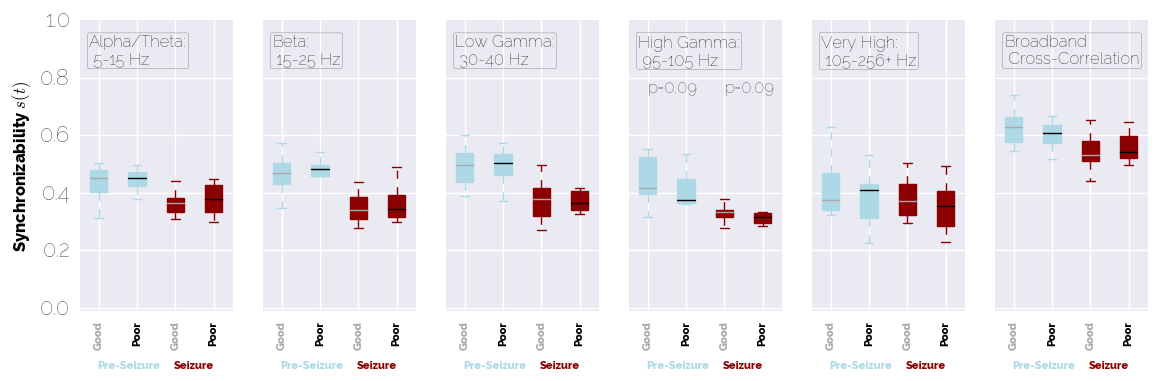

In [20]:
# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 1.0
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.75

# Make function to change boxplot colors
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
#     print bp['boxes']
    for element in ['boxes','whiskers','fliers','medians','caps']:
        for i in range(len(bp[element])):                
            if element is 'medians':
                plt.setp(bp[element][i], color=fill_color[i][1])
            elif element is 'whiskers' or element is 'caps':
                plt.setp(bp[element][i], color=edge_color[i/2])
            else:
                plt.setp(bp[element][i], color=edge_color[i])
    for i,patch in enumerate(bp['boxes']):
        patch.set(hatch=fill_color[i][0])

fig,axs = plt.subplots(1,6,sharey=True)
# fig.set_figwidth(2.75591)
fig.set_size_inches((12,4))
# fig.suptitle('Resection ',fontdict={'family':'raleway','size':18,'color':'black'})
for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Synchronizability $s(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'

#     ax.boxplot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]])
    draw_plot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]],
              ['lightblue','lightblue','darkred','darkred'],
              [('/','darkgray'),('/','black'),('/','darkgray'),('/','black')])
    s,pre_p = scipy.stats.ranksums(good_pre_res[fconn], poor_pre_res[fconn])
    cd = cohen_d(good_pre_res[fconn], poor_pre_res[fconn])
    print title, 'pre', s,pre_p, cd
    s,post_p = scipy.stats.ranksums(good_res[fconn], poor_res[fconn])
    cd = cohen_d(good_res[fconn], poor_res[fconn])
    print title, 'post',s,post_p, cd

    ax.text(0.95,min_y-(max_y-min_y)*0.2,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2,'Seizure',fontdict=font2)
    ax.text(0.75, max_y-(max_y-min_y)*0.15,title, \
            fontdict={'family':'raleway','size':12,'color':'black'}, \
            bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('black')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkgray')
    
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})
        
plt.tight_layout()
# plt.show()
fig.savefig('%s/../fig/FigureS7.png'%(comp_dir))



<h1>Figure S8. Synchronizability of Time-Varying Functional Networks </h1>

0.0562 0.0 0.578512396694
0.0798 0.0 0.595041322314
0.0978 0.0 0.512396694215
0.267 0.0 0.487603305785
0.3338 0.0 0.45867768595
0.1173 0.0 0.673553719008


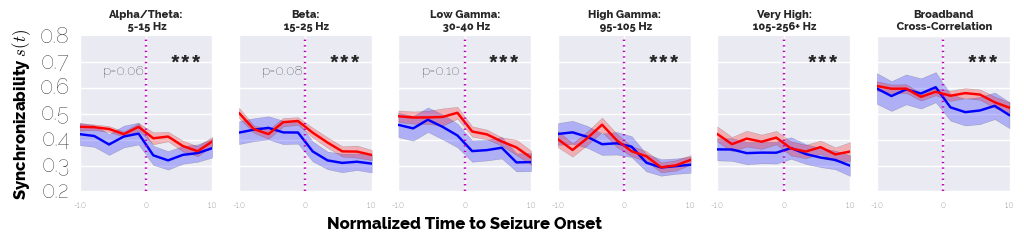

In [21]:
width = 10

# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 1.0
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.95



fig,axs = plt.subplots(1,6,sharey=True, sharex=True)
fig.set_size_inches((12,2))

for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)        
    all_base_sync = get_norm(all_base_sync, width=width)
    
    width = len(map(lambda x: x.values(), all_base_sync.values())[0][0])
    num_fts = width

    pt_iter = 0
    patient_idx = all_base_sync.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_base_sync.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
        if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
            continue
        if patient_id == 'HUP111A':
            continue
        if(skip_chop and 'CHOP' in patient_id):
            continue
        if(skip_mayo and 'Study' in patient_id):
            continue
        if(skip_hup and 'HUP' in patient_id):
            continue
        if not all_base_sync[patient_id]:
            continue

        index_col.append(patient_id)
        row_data = np.array((pt_iter+1,))    
        for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):                    
            if(pid != patient_id):
                continue
            outcome = data['PATIENTS'][patient_id]['Outcome']

            avg_data = np.array(())                    
            for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                if clip == '1000':
                    continue
                res = clip_data                        
                if(res.shape[0] == num_fts+1):
                    res = res[:num_fts]
                try:                
                    avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                except Exception:                
                    avg_data = np.reshape(res,(num_fts,1))                    
            avg_data = np.nanmedian(avg_data,axis=1)

            # Update row_data
            row_data = np.hstack((row_data,avg_data)) 

            # Update header
            if(pt_iter == 0):
                for t in range(1,num_fts+1):
                    out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
        if(get_outcome(outcome) == 'Good'):        
            row_data = np.hstack((row_data,[0]))        
        else:
            row_data = np.hstack((row_data,[1]))
        if(row_data.shape[0] != num_fts+2):
            continue
        ft_matrix[pt_iter,:] = row_data
        pt_iter += 1
    
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')

    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')







    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Synchronizability $s(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
        ax.set_xlabel('Normalized Time to Seizure Onset',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'
    
    ax.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0),'b')
    ax.hold(True)
    ax.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0)-good_outcome_data_err,np.nanmedian(good_outcome_data,axis=0)+good_outcome_data_err,facecolor='blue',alpha=0.25)
    ax.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0), 'r')
    ax.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0)-poor_outcome_data_err,np.nanmedian(poor_outcome_data,axis=0)+poor_outcome_data_err,facecolor='red',alpha=0.25)
    ax.set_xlim(( -1.0, 1.0))    
    ax.set_ylim((0.2, 0.8))
    ax.plot([0,0],[0.2,0.8],color='m',linestyle=':')
    ax.set_yticks(np.arange(0.2,0.8,0.1))
    
    ax.set_xticks([-1.0,0,1.0])
    ax.set_xticklabels([-1.0,0,1.0],fontdict={'size':6,'weight':'normal'})

    ax.set_title(title,fontdict={'size':8,'weight':'bold'})    
    
    ax.grid(True)
    
    # Make significance indicators

    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:width/4.0*3.0],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    pre_p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    post_p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    if pre_p < 0.001:
        ax.text(-0.65,0.65, '***',{'weight':'bold', 'size':22})
    elif pre_p < 0.01:
        ax.text(-0.65,0.65, '**',{'weight':'bold', 'size':22})
    elif pre_p < 0.05:
        ax.text(-0.65,0.65, '*',{'weight':'bold', 'size':22})
    elif pre_p < 0.1:
        ax.text(-0.65,0.65, 'p=%0.2f'%pre_p,{'weight':'normal', 'size':10})
    
    if post_p < 0.001:
        ax.text(0.35,0.65, '***',{'weight':'bold', 'size':22})
    elif post_p < 0.01:
        ax.text(0.35,0.65, '**',{'weight':'bold', 'size':22})
    elif post_p < 0.05:
        ax.text(0.35,0.65, '*',{'weight':'bold', 'size':22})
    elif post_p < 0.1:
        ax.text(0.35,0.65, 'p=%0.2f'%post_p,{'weight':'normal', 'size':12})

    print pre_p, post_p, roc_auc

plt.savefig('../../fig/FigureS8.png',bbox_inches='tight', format='png', dpi=1200)
# plt.show()

<h1>Figure S9. ROC Cuve of using Change in synchronizability as a feature </h1>

alphatheta -1.81105462759 0.0701323959952
0.663101604278
beta -1.10544892853 0.268965112542
0.620320855615
lowgamma -0.964327788714 0.334881613081
0.614973262032
highgamma -0.823206648902 0.410390488491
0.593582887701
veryhigh -0.493923989341 0.621359861767
0.572192513369
broadband_CC -3.41042754545 0.000648611150641
broadband_CC -3.41042754545 0.000648611150641
0.893048128342
alphatheta 0.663101604278
beta 0.620320855615
lowgamma 0.614973262032
highgamma 0.593582887701
veryhigh 0.572192513369
broadband_CC 0.893048128342


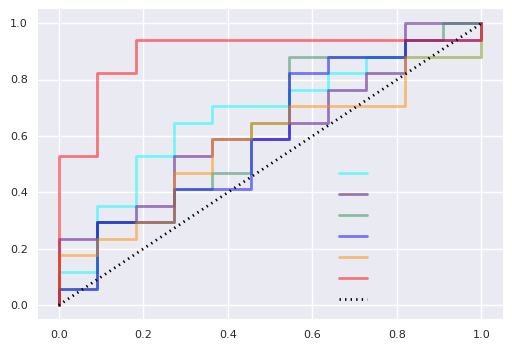

In [22]:
fig,axs = plt.subplots(1,1)
ax = axs
fig.set_size_inches((6,4))

width = 10
all_features = []
roc_results = []
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)
    all_base_sync = get_norm(all_base_sync, width=width)
    width = len(map(lambda x: x.values(), all_base_sync.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_base_sync.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_base_sync.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    
    
    all_data = np.array(())

    for patient_id in sorted(patient_idx):
            if patient_id == 'HUP111A':
                continue
            if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
                continue
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_base_sync[patient_id]:
                continue
    #                 print patient_id
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome'] 
                
                avg_data = np.array(())
                for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                    if clip == '1000':
                        continue
                    res = clip_data                        
                    if(res.shape[0] == num_fts+1):
                        res = res[:num_fts]
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                    except Exception:                
                        avg_data = np.reshape(res,(num_fts,1))                    
                #%DEBUG
#                     print patient_id, clip, avg_data.shape
                avg_data = np.nanmedian(avg_data,axis=1)

                # Update row_data
                row_data = np.append([clip_iter+1],avg_data)
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                # Update header
                if(clip_iter == 0):
                    for t in range(1,num_fts+1):
                        out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                if(get_outcome(outcome) == 'Good'):        
                    row_data = np.append(row_data,[0])        
                else:
                    row_data = np.append(row_data,[1])
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                try:
                    all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                except Exception:
                    all_data = row_data
                clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
    good_outcome_feature = np.nanmedian(all_data[outcomex==0,width/2:],axis=1)-np.nanmedian(all_data[outcomex==0,:width/2],axis=1)
    poor_outcome_feature = np.nanmedian(all_data[outcomex==1,width/2:],axis=1)-np.nanmedian(all_data[outcomex==1,:width/2],axis=1)
    all_features.append(good_outcome_feature)
    all_features.append(poor_outcome_feature)
    s,p = scipy.stats.ranksums(good_outcome_feature, poor_outcome_feature)
    print fconn, s,p
    if p < 0.05:
        print fconn, s,p
    
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
    tpr = np.loadtxt('FigureS9_%s_sensitivity.csv'%fconn)
    fpr = np.loadtxt('FigureS9_%s_specificity.csv'%fconn)
    fpr = 1-fpr
    roc_auc = auc(fpr,tpr)
    print roc_auc
    roc_results.append((fconn,roc_auc,fpr,tpr))
    np.savetxt('FigureS9_%s_outcomex.csv'%fconn,outcomex)
    np.savetxt('FigureS9_%s_threshold.csv'%fconn,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))
    
# ax.boxplot(all_features)

# ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
# ax.set_xticklabels(['Good','Poor','Good','Poor','Good','Poor','Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
# ax.set_ylim([-0.3,0.05])
# for ii in range(1,10,2):
#     ax.get_xticklabels()[ii].set_color('black')
# for ii in range(0,10,2):
#     ax.get_xticklabels()[ii].set_color('darkgray')
# ax.text(0.75,-0.25,'Alpha/Theta:\n 5-15 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(2.75,-0.25,'Beta:\n 15-25 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(4.75,-0.25,'Low Gamma:\n 30-40 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(6.75,-0.25,'High Gamma:\n 95-105 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(8.75,-0.25,'Broadband\n Cross-\nCorrelation',fontdict={'size':10,'weight':'normal'})
# ax.set_ylabel('Change in Synchronizability \n(pre-ictal to ictal)',fontdict={'size':14,'weight':'bold'})

# ax = axs[1]
colors = ['cyan', 'indigo', 'seagreen', 'blue', 'darkorange', 'red']
i = 0
for fconn, roc_auc, fpr, tpr in roc_results:
#     ax.plot(fpr, tpr, lw=2, color=colors[i], linestyle='-', label = '%s (%0.2f)'%(fconn,roc_auc), alpha=0.5)
    ax.plot(fpr, tpr, lw=2, color=colors[i], linestyle='-', label = '                       ', alpha=0.5)
    print fconn, roc_auc
    ax.hold(True)
    i += 1
# Plot the ROC curve for luck along with area
ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='k', label=' ')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])

# ax.set_xlabel('1 - Specificity',fontdict={'size':14,'weight':'bold'})
# ax.set_ylabel('Sensitivity',fontdict={'size':14,'weight':'bold'})
ax.set_xticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0],fontdict={'size':8,'family':'normal'})
ax.set_yticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0],fontdict={'size':8,'family':'normal'})
ax.legend(loc="lower right",prop={'size':10,'weight':'bold', 'family':'normal'})

# plt.show()
# plt.title('Base Synchronizability',fontdict={'size':20})
# plt.savefig('../../fig/FigureS8.svg',bbox_inches='tight', format='svg', dpi=1200)
plt.savefig('../../fig/FigureS9.png',bbox_inches='tight', format='png', dpi=1200)

<h1>Figure S16. Distribution of synchronizability (seterotypic seizures) </h1>

In [50]:
skip_chop = True
skip_mayo = False
skip_hup = False
dilate_radius = 0

all_base_sync = gather_base_sync_results(dilate_radius,'highgamma', skip_chop, skip_mayo)
PATIENT_IDX = sorted(all_base_sync.keys())
comp_dir = os.path.expanduser(data['COMP_DIR'])

# Collect data
# Initialize boxplot arrays
good_pre_res = {}
good_res = {}
poor_pre_res = {}
poor_res = {}

for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    # All results
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)
    try:
        good_pre_res[fconn]        
    except KeyError:
        good_pre_res[fconn] = []
        good_res[fconn] = []
        poor_pre_res[fconn] = []
        poor_res[fconn] = []
    for patient_id in PATIENT_IDX:
        if patient_id == 'HUP111A':
            continue
        if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
            continue
        # Get outcome
        outcome = data['PATIENTS'][patient_id]['Outcome']
        outcome = get_outcome(outcome)
        pre_res = []
        pre_non_res = []
        res = []
        non_res = []
        
        # Get resected nodes and non-resected nodes
        first_clip_id = data['PATIENTS'][patient_id]['Events']['Ictal'].keys()[0]
        base_sync = all_base_sync[patient_id][first_clip_id]

        if outcome == 'Good':
            # Load event

            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id == '1000':
                    continue
                common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
                if stype != common_stype:
                    continue
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    base_sync = all_base_sync[patient_id][clip_id]
                except KeyError:
                    continue

                base_sync = base_sync[:base_sync.shape[0]/2]
                mean_base_sync = np.nanmedian(base_sync)
                
                pre_res.append(mean_base_sync)
    
                try:
                    base_sync = all_base_sync[patient_id][clip_id]
                except KeyError:
                    continue

                base_sync = base_sync[base_sync.shape[0]/2:]
                mean_base_sync = np.nanmedian(base_sync)
                
                res.append(mean_base_sync)

            good_pre_res[fconn].append(np.nanmedian(pre_res))
            good_res[fconn].append(np.nanmedian(res))
        if outcome == 'Poor':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id == '1000':
                    continue
                common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
                if stype != common_stype:
                    continue
#                 print patient_id, clip_id
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    base_sync = all_base_sync[patient_id][clip_id]
                except KeyError:
                    continue

                base_sync = base_sync[:base_sync.shape[0]/2]
                mean_base_sync = np.nanmedian(base_sync)

                pre_res.append(mean_base_sync)
    
                try:
                    base_sync = all_base_sync[patient_id][clip_id]
                except KeyError:
                    continue
                
                base_sync = base_sync[base_sync.shape[0]/2:]
                mean_base_sync = np.nanmedian(base_sync)
                
                res.append(mean_base_sync)
            poor_pre_res[fconn].append(np.nanmedian(pre_res))
            poor_res[fconn].append(np.nanmedian(res))
           


ERROR HUP083
ERROR Study022
ERROR Study028


0.457445527285 0.451399298038 0.36720332116 0.380347525622
Alpha/Theta:
 5-15 Hz pre -0.16464132978 0.869226298639 -0.222602989407
Alpha/Theta:
 5-15 Hz post -0.540964369279 0.588532141899 -0.30646194112
0.471313231072 0.486342868284 0.358687242867 0.34592390015
Beta:
 15-25 Hz pre -0.68208550909 0.495184882988 -0.145414859136
Beta:
 15-25 Hz post -0.35280284953 0.72423624736 -0.189250429613
0.5078542527 0.509364529481 0.412752991548 0.37234215274
Low Gamma:
 30-40 Hz pre 0.0705605699059 0.943747492813 0.0458669130507
Low Gamma:
 30-40 Hz post 0.35280284953 0.72423624736 -0.00852574480273
0.418677045753 0.38044277847 0.334644455637 0.317194506417
High Gamma:
 95-105 Hz pre 1.43473158809 0.151363599187 0.488154874234
High Gamma:
 95-105 Hz post 1.76401424765 0.0777295804624 0.362591727063
0.369684204442 0.414037094768 0.373635770082 0.355254221846
Very High:
 105-256+ Hz pre 0.87024702884 0.384165420205 0.342898471152
Very High:
 105-256+ Hz post 1.1995296884 0.230322047898 0.4702201218

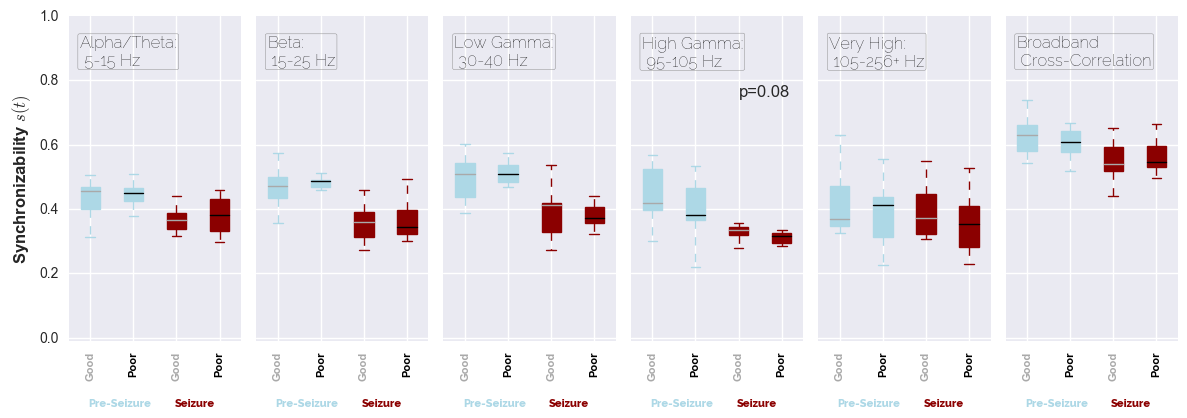

In [51]:
# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 1.0
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.75

# Make function to change boxplot colors
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
#     print bp['boxes']
    for element in ['boxes','whiskers','fliers','medians','caps']:
        for i in range(len(bp[element])):                
            if element is 'medians':
                plt.setp(bp[element][i], color=fill_color[i][1])
            elif element is 'whiskers' or element is 'caps':
                plt.setp(bp[element][i], color=edge_color[i/2])
            else:
                plt.setp(bp[element][i], color=edge_color[i])
    for i,patch in enumerate(bp['boxes']):
        patch.set(hatch=fill_color[i][0])

fig,axs = plt.subplots(1,6,sharey=True)
# fig.set_figwidth(2.75591)
fig.set_size_inches((12,4))
# fig.suptitle('Resection ',fontdict={'family':'raleway','size':18,'color':'black'})
for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Synchronizability $s(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'

#     ax.boxplot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]])
    draw_plot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]],
              ['lightblue','lightblue','darkred','darkred'],
              [('/','darkgray'),('/','black'),('/','darkgray'),('/','black')])
    print np.nanmedian(good_pre_res[fconn]),np.nanmedian(poor_pre_res[fconn]),np.nanmedian(good_res[fconn]),np.nanmedian(poor_res[fconn])
    s,pre_p = scipy.stats.ranksums(good_pre_res[fconn], poor_pre_res[fconn])
    cd = cohen_d(good_pre_res[fconn], poor_pre_res[fconn])
    print title, 'pre', s,pre_p, cd
    s,post_p = scipy.stats.ranksums(good_res[fconn], poor_res[fconn])
    cd = cohen_d(good_res[fconn], poor_res[fconn])
    print title, 'post',s,post_p, cd

    ax.text(0.95,min_y-(max_y-min_y)*0.2,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2,'Seizure',fontdict=font2)
    ax.text(0.75, max_y-(max_y-min_y)*0.15,title, \
            fontdict={'family':'raleway','size':12,'color':'black'}, \
            bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('black')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkgray')
    
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})
        
plt.tight_layout()
# plt.show()
fig.savefig('%s/../fig/FigureS16.png'%(comp_dir))



<h1>Figure S17. Synchronizability of Time-Varying Functinoal Networks (stereotypic seizures)</h1>

0.0567 0.0 0.561264822134
0.054 0.0 0.553359683794
0.0771 0.0 0.454545454545
0.1582 0.0 0.466403162055
ERROR HUP083
ERROR Study022
ERROR Study028
0.2539 0.0 0.411067193676
0.1238 0.0 0.660079051383


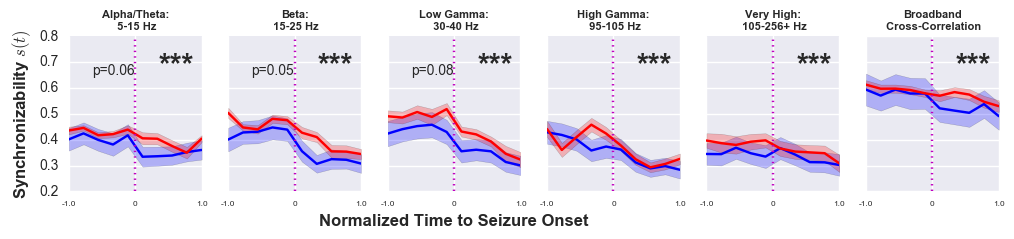

In [52]:
width = 10

# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 1.0
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.95



fig,axs = plt.subplots(1,6,sharey=True, sharex=True)
fig.set_size_inches((12,2))

for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)        
    all_base_sync = get_norm(all_base_sync, width=width)
    
    width = len(map(lambda x: x.values(), all_base_sync.values())[0][0])
    num_fts = width

    pt_iter = 0
    patient_idx = all_base_sync.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_base_sync.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
        if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
            continue
        if patient_id == 'HUP111A':
            continue
        if(skip_chop and 'CHOP' in patient_id):
            continue
        if(skip_mayo and 'Study' in patient_id):
            continue
        if(skip_hup and 'HUP' in patient_id):
            continue
        if not all_base_sync[patient_id]:
            continue

        index_col.append(patient_id)
        row_data = np.array((pt_iter+1,))    
        for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):                    
            if(pid != patient_id):
                continue
            outcome = data['PATIENTS'][patient_id]['Outcome']

            avg_data = np.array(())                    
            for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                if clip == '1000':
                    continue
                common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                if stype != common_stype:
                    continue
                res = clip_data                        
                if(res.shape[0] == num_fts+1):
                    res = res[:num_fts]
                try:                
                    avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                except Exception:                
                    avg_data = np.reshape(res,(num_fts,1))                    
            avg_data = np.nanmedian(avg_data,axis=1)

            # Update row_data
            row_data = np.hstack((row_data,avg_data)) 

            # Update header
            if(pt_iter == 0):
                for t in range(1,num_fts+1):
                    out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
        if(get_outcome(outcome) == 'Good'):        
            row_data = np.hstack((row_data,[0]))        
        else:
            row_data = np.hstack((row_data,[1]))
        if(row_data.shape[0] != num_fts+2):
            continue
        ft_matrix[pt_iter,:] = row_data
        pt_iter += 1
    
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')

    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')







    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Synchronizability $s(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
        ax.set_xlabel('Normalized Time to Seizure Onset',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'
    
    ax.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0),'b')
    ax.hold(True)
    ax.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(good_outcome_data,axis=0)-good_outcome_data_err,np.nanmedian(good_outcome_data,axis=0)+good_outcome_data_err,facecolor='blue',alpha=0.25)
    ax.plot(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0), 'r')
    ax.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmedian(poor_outcome_data,axis=0)-poor_outcome_data_err,np.nanmedian(poor_outcome_data,axis=0)+poor_outcome_data_err,facecolor='red',alpha=0.25)
    ax.set_xlim(( -1.0, 1.0))    
    ax.set_ylim((0.2, 0.8))
    ax.plot([0,0],[0.2,0.8],color='m',linestyle=':')
    ax.set_yticks(np.arange(0.2,0.8,0.1))
    
    ax.set_xticks([-1.0,0,1.0])
    ax.set_xticklabels([-1.0,0,1.0],fontdict={'size':6,'weight':'normal'})

    ax.set_title(title,fontdict={'size':8,'weight':'bold'})    
    
    ax.grid(True)
    
    # Make significance indicators

    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:width/4.0*3.0],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    pre_p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    post_p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    if pre_p < 0.001:
        ax.text(-0.65,0.65, '***',{'weight':'bold', 'size':22})
    elif pre_p < 0.01:
        ax.text(-0.65,0.65, '**',{'weight':'bold', 'size':22})
    elif pre_p < 0.05:
        ax.text(-0.65,0.65, '*',{'weight':'bold', 'size':22})
    elif pre_p < 0.1:
        ax.text(-0.65,0.65, 'p=%0.2f'%pre_p,{'weight':'normal', 'size':10})
    
    if post_p < 0.001:
        ax.text(0.35,0.65, '***',{'weight':'bold', 'size':22})
    elif post_p < 0.01:
        ax.text(0.35,0.65, '**',{'weight':'bold', 'size':22})
    elif post_p < 0.05:
        ax.text(0.35,0.65, '*',{'weight':'bold', 'size':22})
    elif post_p < 0.1:
        ax.text(0.35,0.65, 'p=%0.2f'%post_p,{'weight':'normal', 'size':12})

    print pre_p, post_p, roc_auc

plt.savefig('../../fig/FigureS17.png',bbox_inches='tight', format='png', dpi=1200)
# plt.show()


<h1>Figure S17. ROC Curve of using Change in synchronizability as a feature (stereotypic features) </h1>

alphatheta -1.24657006834 0.212555182427
0.641711229947
beta -0.635045129153 0.525398982181
0.427807486631
lowgamma -0.117600949843 0.906383852304
0.513368983957
highgamma -0.117600949843 0.906383852304
0.486631016043
ERROR HUP083
ERROR Study022
ERROR Study028
veryhigh 0.35280284953 0.72423624736
0.459893048128
broadband_CC -2.51666032664 0.0118472984628
broadband_CC -2.51666032664 0.0118472984628
0.786096256684
alphatheta 0.641711229947
beta 0.427807486631
lowgamma 0.513368983957
highgamma 0.486631016043
veryhigh 0.459893048128
broadband_CC 0.786096256684


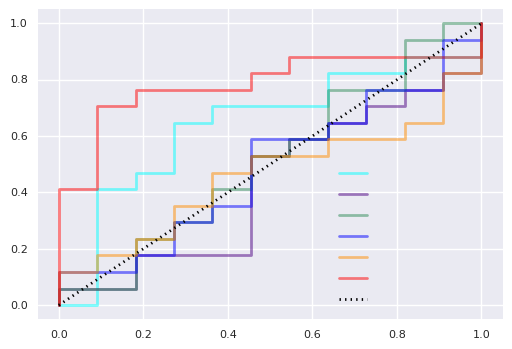

In [55]:
fig,axs = plt.subplots(1,1)
ax = axs
fig.set_size_inches((6,4))

width = 10
all_features = []
roc_results = []
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_base_sync = gather_base_sync_results(dilate_radius,fconn, skip_chop, skip_mayo)
    all_base_sync = get_norm(all_base_sync, width=width)
    width = len(map(lambda x: x.values(), all_base_sync.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_base_sync.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_base_sync.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    
    
    all_data = np.array(())

    for patient_id in sorted(patient_idx):
            if patient_id == 'HUP111A':
                continue
            if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
                continue
            
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            if not all_base_sync[patient_id]:
                continue
#             print patient_id
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_base_sync.items(), key=lambda x:x[0]):
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome'] 
                
                avg_data = np.array(())
                for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
                    res = clip_data                        
                    if(res.shape[0] == num_fts+1):
                        res = res[:num_fts]
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                    except Exception:                
                        avg_data = np.reshape(res,(num_fts,1))                    
                #%DEBUG
#                     print patient_id, clip, avg_data.shape
                avg_data = np.nanmedian(avg_data,axis=1)

                # Update row_data
                row_data = np.append([clip_iter+1],avg_data)
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                # Update header
                if(clip_iter == 0):
                    for t in range(1,num_fts+1):
                        out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                if(get_outcome(outcome) == 'Good'):        
                    row_data = np.append(row_data,[0])        
                else:
                    row_data = np.append(row_data,[1])
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                try:
                    all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                except Exception:
                    all_data = row_data
                clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
    good_outcome_feature = np.nanmedian(all_data[outcomex==0,width/2:],axis=1)-np.nanmedian(all_data[outcomex==0,:width/2],axis=1)
    poor_outcome_feature = np.nanmedian(all_data[outcomex==1,width/2:],axis=1)-np.nanmedian(all_data[outcomex==1,:width/2],axis=1)
    all_features.append(good_outcome_feature)
    all_features.append(poor_outcome_feature)
    s,p = scipy.stats.ranksums(good_outcome_feature, poor_outcome_feature)
    print fconn, s,p
    if p < 0.05:
        print fconn, s,p
    
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
    tpr = np.loadtxt('FigureS18_%s_sensitivity.csv'%fconn)
    fpr = np.loadtxt('FigureS18_%s_specificity.csv'%fconn)
    fpr = 1-fpr
    
    roc_auc = auc(fpr,tpr)
    print roc_auc
    roc_results.append((fconn,roc_auc,fpr,tpr))
    np.savetxt('FigureS18_%s_outcomex.csv'%fconn,outcomex)
    np.savetxt('FigureS18_%s_threshold.csv'%fconn,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))
    
# ax.boxplot(all_features)

# ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
# ax.set_xticklabels(['Good','Poor','Good','Poor','Good','Poor','Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
# ax.set_ylim([-0.3,0.05])
# for ii in range(1,10,2):
#     ax.get_xticklabels()[ii].set_color('black')
# for ii in range(0,10,2):
#     ax.get_xticklabels()[ii].set_color('darkgray')
# ax.text(0.75,-0.25,'Alpha/Theta:\n 5-15 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(2.75,-0.25,'Beta:\n 15-25 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(4.75,-0.25,'Low Gamma:\n 30-40 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(6.75,-0.25,'High Gamma:\n 95-105 Hz',fontdict={'size':10,'weight':'normal'})
# ax.text(8.75,-0.25,'Broadband\n Cross-\nCorrelation',fontdict={'size':10,'weight':'normal'})
# ax.set_ylabel('Change in Synchronizability \n(pre-ictal to ictal)',fontdict={'size':14,'weight':'bold'})

# ax = axs[1]
colors = ['cyan', 'indigo', 'seagreen', 'blue', 'darkorange', 'red']
i = 0
for fconn, roc_auc, fpr, tpr in roc_results:
#     ax.plot(fpr, tpr, lw=2, color=colors[i], linestyle='-', label = '%s (%0.2f)'%(fconn,roc_auc), alpha=0.5)
    ax.plot(fpr, tpr, lw=2, color=colors[i], linestyle='-', label = '                       ', alpha=0.5)
    print fconn, roc_auc
    ax.hold(True)
    i += 1
# Plot the ROC curve for luck along with area
ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='k', label=' ')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])

# ax.set_xlabel('1 - Specificity',fontdict={'size':14,'weight':'bold'})
# ax.set_ylabel('Sensitivity',fontdict={'size':14,'weight':'bold'})
ax.set_xticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0],fontdict={'size':8,'family':'normal'})
ax.set_yticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0],fontdict={'size':8,'family':'normal'})
ax.legend(loc="lower right",prop={'size':10,'weight':'bold', 'family':'normal'})

# plt.title('Base Synchronizability',fontdict={'size':20})
# plt.savefig('../../fig/FigureS7.svg',bbox_inches='tight', format='svg', dpi=1200)
plt.savefig('../../fig/FigureS18.png',bbox_inches='tight', format='png', dpi=1200)

In [68]:
skip_chop = True
skip_mayo = False
skip_hup = False
dilate_radius = 0

all_base_sync = gather_base_sync_results(dilate_radius,'highgamma', skip_chop, skip_mayo)

PATIENT_IDX = sorted(all_base_sync.keys())
comp_dir = os.path.expanduser(data['COMP_DIR'])

# Collect data
# Initialize boxplot arrays
good_pre_res = {}
good_res = {}
poor_pre_res = {}
poor_res = {}

final = {}

for patient_id in PATIENT_IDX:
    if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
        continue
    final[patient_id] = []
    for clip in all_base_sync[patient_id].keys():
        if clip == '1000':
            continue
        final[patient_id].append(clip)
        final[patient_id] = sorted(final[patient_id], key=lambda x: int(x))

In [69]:
final

{u'HUP064': [u'1'],
 u'HUP065': [u'1', u'2', u'3'],
 u'HUP068': [u'1', u'2', u'3', u'4', u'5'],
 u'HUP070': [u'1', u'2', u'4', u'5', u'6', u'7', u'8'],
 u'HUP073': [u'1', u'2', u'3', u'4', u'5'],
 u'HUP074': [u'2', u'3', u'4', u'6', u'7'],
 u'HUP075': [u'5'],
 u'HUP078': [u'1', u'2', u'3', u'4', u'5'],
 u'HUP080': [u'1', u'2', u'3', u'4'],
 u'HUP082': [u'1', u'2', u'4', u'5', u'6', u'7'],
 u'HUP083': [u'7',
  u'9',
  u'11',
  u'12',
  u'13',
  u'14',
  u'16',
  u'18',
  u'19',
  u'20',
  u'22',
  u'23',
  u'25'],
 u'HUP086': [u'1', u'2'],
 u'HUP087': [u'1', u'2'],
 u'HUP088': [u'1', u'2', u'3'],
 u'HUP094': [u'1', u'2', u'3'],
 u'HUP105': [u'1', u'2'],
 u'HUP106': [u'1', u'2', u'3', u'4'],
 u'HUP107': [u'1', u'2', u'3', u'4', u'5', u'6', u'7'],
 u'HUP111A': [u'1', u'2', u'3', u'4', u'5'],
 u'HUP111B': [u'11',
  u'12',
  u'15',
  u'16',
  u'17',
  u'18',
  u'19',
  u'20',
  u'21',
  u'22'],
 u'HUP116': [u'1', u'2', u'3'],
 u'Study012': [u'1',
  u'2',
  u'3',
  u'4',
  u'5',
  u'6',
  u'

In [75]:
cnt = 0
for pt,val in sorted(final.items(), key=lambda x: x[0]):
    for p in val:
        print pt,p
        stype = data['PATIENTS'][pt]['Events']['Ictal'][p]['SeizureType']
        if 'SPS' in stype:
            cnt += 1
#             break
print cnt

HUP064 1
HUP065 1
HUP065 2
HUP065 3
HUP068 1
HUP068 2
HUP068 3
HUP068 4
HUP068 5
HUP070 1
HUP070 2
HUP070 4
HUP070 5
HUP070 6
HUP070 7
HUP070 8
HUP073 1
HUP073 2
HUP073 3
HUP073 4
HUP073 5
HUP074 2
HUP074 3
HUP074 4
HUP074 6
HUP074 7
HUP075 5
HUP078 1
HUP078 2
HUP078 3
HUP078 4
HUP078 5
HUP080 1
HUP080 2
HUP080 3
HUP080 4
HUP082 1
HUP082 2
HUP082 4
HUP082 5
HUP082 6
HUP082 7
HUP083 7
HUP083 9
HUP083 11
HUP083 12
HUP083 13
HUP083 14
HUP083 16
HUP083 18
HUP083 19
HUP083 20
HUP083 22
HUP083 23
HUP083 25
HUP086 1
HUP086 2
HUP087 1
HUP087 2
HUP088 1
HUP088 2
HUP088 3
HUP094 1
HUP094 2
HUP094 3
HUP105 1
HUP105 2
HUP106 1
HUP106 2
HUP106 3
HUP106 4
HUP107 1
HUP107 2
HUP107 3
HUP107 4
HUP107 5
HUP107 6
HUP107 7
HUP111A 1
HUP111A 2
HUP111A 3
HUP111A 4
HUP111A 5
HUP111B 11
HUP111B 12
HUP111B 15
HUP111B 16
HUP111B 17
HUP111B 18
HUP111B 19
HUP111B 20
HUP111B 21
HUP111B 22
HUP116 1
HUP116 2
HUP116 3
Study012 1
Study012 2
Study012 3
Study012 4
Study012 5
Study012 6
Study012 7
Study012 8
Study012 9
S

In [84]:
map(lambda x: (x[0],len(x[1])), final.items())
    

[(u'HUP111A', 5),
 (u'HUP111B', 10),
 (u'Study020', 7),
 (u'Study022', 6),
 (u'HUP116', 3),
 (u'Study029', 3),
 (u'Study028', 3),
 (u'HUP094', 3),
 (u'HUP078', 5),
 (u'HUP074', 5),
 (u'HUP075', 1),
 (u'HUP073', 5),
 (u'HUP070', 7),
 (u'Study019', 36),
 (u'Study012', 28),
 (u'Study016', 6),
 (u'Study017', 9),
 (u'HUP106', 4),
 (u'HUP107', 7),
 (u'HUP105', 2),
 (u'HUP086', 2),
 (u'HUP083', 13),
 (u'HUP082', 6),
 (u'HUP080', 4),
 (u'HUP087', 2),
 (u'HUP068', 5),
 (u'HUP065', 3),
 (u'HUP064', 1),
 (u'HUP088', 3)]